In [1]:
import numpy as np

# 加载数据
X = np.load('checkboard_plot_10/X.npy')  # 黑色区域
y = np.load('checkboard_plot_10/y.npy')      # 红色区域

# 合并特征和标签
features = X
targets = y

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('checkboard_plot_10/features.npy', features)  # 保存打乱的特征数组
np.save('checkboard_plot_10/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (11000, 2)
打乱后的标签数组形状： (11000,)
前5个特征：
 [[-0.23410499  0.87720125]
 [ 0.98231149  1.2455915 ]
 [ 2.30112996  0.34528129]
 [ 0.31313535  2.05912531]
 [ 0.21596433  1.55132262]]
前5个标签： [0 0 0 0 0]


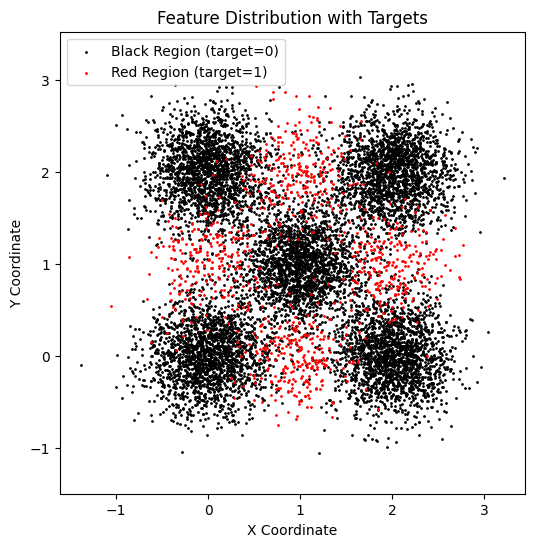

In [2]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('checkboard_plot_10/features.npy')
y = np.load('checkboard_plot_10/targets.npy')

X_test = np.load('checkboard_plot_10/X_test.npy')
y_test = np.load('checkboard_plot_10/y_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-15 13:42:31,013 - DualGranularBalancedDeepForest
the shape of training samples: (11000, 2) - 2024-12-15 13:42:31,013 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-15 13:42:31,014 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-15 13:42:31,014 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-15 13:42:31,015 - DualGranularBalancedDeepForest
The shape of x_train is (11000, 2) - 2024-12-15 13:42:31,016 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9214, f1_score=0.7403, auc=0.8981, gmean=0.6774, sen=0.4750, spe=0.9660, aupr=0.5199 - 2024-12-15 13:42:33,110 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9209, f1_score=0.7285, auc=0.8830, gmean=0.6494, sen=0.4350, spe=0.9695, aupr=0.5208 - 2024-12-15 13:42:33,115 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9282, f1_score=0.7495, auc=0.8977, gmean=0.6697, sen=0.4600, spe=0.9750, aupr=0.5396 - 2024-12-15 13:42:33,121 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9205, f1_score=0.7188, auc=0.8841, gmean=0.6274, sen=0.4050, spe=0.9720, aupr=0.5186 - 2024-12-15 13:42:33,127 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9232, f1_score=0.7411, auc=0.8873, gmean=0.6713, sen=0.4650, spe=0.9690, aupr=0.5197 - 2024-12-15 13:42:33,133 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9109, f1_score=0.7177, auc=0.8582, gmean=0.6631, sen=0.4600, spe=0.9560, aupr=0.4920 - 2024-12-15 13:42:44,045 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9136, f1_score=0.7364, auc=0.8960, gmean=0.7008, sen=0.5150, spe=0.9535, aupr=0.5430 - 2024-12-15 13:42:44,052 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9191, f1_score=0.7563, auc=0.8710, gmean=0.7313, sen=0.5600, spe=0.9550, aupr=0.5381 - 2024-12-15 13:42:44,058 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9177, f1_score=0.7412, auc=0.8984, gmean=0.6959, sen=0.5050, spe=0.9590, aupr=0.5441 - 2024-12-15 13:42:44,064 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9145, f1_score=0.7171, auc=0.8849, gmean=0.6471, sen=0.4350, spe=0.9625, aupr=0.5140 - 2024-12-15 13:42:44,069 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9364, f1_score=0.8125, auc=0.8905, gmean=0.8088, sen=0.6800, spe=0.9620, aupr=0.6707 - 2024-12-15 13:43:00,240 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9345, f1_score=0.8029, auc=0.9007, gmean=0.7883, sen=0.6450, spe=0.9635, aupr=0.6888 - 2024-12-15 13:43:00,245 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9400, f1_score=0.8299, auc=0.9195, gmean=0.8455, sen=0.7450, spe=0.9595, aupr=0.7298 - 2024-12-15 13:43:00,250 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9445, f1_score=0.8345, auc=0.9297, gmean=0.8290, sen=0.7100, spe=0.9680, aupr=0.7373 - 2024-12-15 13:43:00,256 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9391, f1_score=0.8182, auc=0.9052, gmean=0.8101, sen=0.6800, spe=0.9650, aupr=0.6580 - 2024-12-15 13:43:00,261 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9505, f1_score=0.8477, auc=0.9231, gmean=0.8318, sen=0.7100, spe=0.9745, aupr=0.7734 - 2024-12-15 13:43:16,581 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9559, f1_score=0.8626, auc=0.9531, gmean=0.8425, sen=0.7250, spe=0.9790, aupr=0.8365 - 2024-12-15 13:43:16,588 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9473, f1_score=0.8337, auc=0.9354, gmean=0.8054, sen=0.6650, spe=0.9755, aupr=0.7668 - 2024-12-15 13:43:16,593 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9550, f1_score=0.8604, auc=0.9296, gmean=0.8421, sen=0.7250, spe=0.9780, aupr=0.8029 - 2024-12-15 13:43:16,599 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9491, f1_score=0.8387, auc=0.9046, gmean=0.8091, sen=0.6700, spe=0.9770, aupr=0.7332 - 2024-12-15 13:43:16,604 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9614, f1_score=0.8717, auc=0.9284, gmean=0.8259, sen=0.6900, spe=0.9885, aupr=0.8266 - 2024-12-15 13:43:32,871 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9591, f1_score=0.8618, auc=0.9385, gmean=0.8079, sen=0.6600, spe=0.9890, aupr=0.8296 - 2024-12-15 13:43:32,876 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9573, f1_score=0.8518, auc=0.9476, gmean=0.7868, sen=0.6250, spe=0.9905, aupr=0.8349 - 2024-12-15 13:43:32,881 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9573, f1_score=0.8633, auc=0.9267, gmean=0.8323, sen=0.7050, spe=0.9825, aupr=0.8098 - 2024-12-15 13:43:32,887 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9641, f1_score=0.8777, auc=0.9412, gmean=0.8215, sen=0.6800, spe=0.9925, aupr=0.8413 - 2024-12-15 13:43:32,893 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 4
num_layers: 5
Training time: 74.49s
last_layer_index 3
last_layer_index 3
UncertaintyAwareDeepForest - Accuracy: 0.9245
UncertaintyAwareDeepForest - AUC: 0.9023
UncertaintyAwareDeepForest - AUPR: 0.5880
UncertaintyAwareDeepForest - Sensitivity: 0.5550
UncertaintyAwareDeepForest - Specificity: 0.9615
UncertaintyAwareDeepForest - G-Mean: 0.7305
UncertaintyAwareDeepForest - F1 Macro: 0.7654


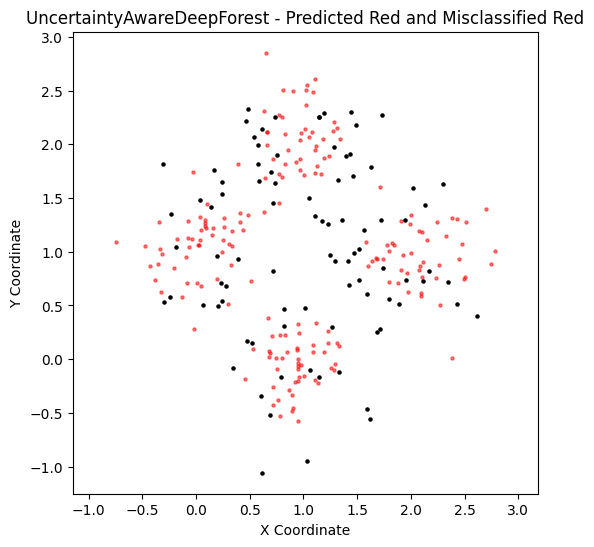

In [19]:
import os
import time
# 配置输出文件夹
output_dir = "checkboard_plot_10"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    
    start_time = time.time()
    model.fit(X, y)
    end_time = time.time()
    print(f"Training time: {end_time - start_time:.2f}s")
    
    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training UnderBagging...
UnderBagging - Accuracy: 0.8741
UnderBagging - AUC: 0.9119
UnderBagging - AUPR: 0.5722
UnderBagging - Sensitivity: 0.7700
UnderBagging - Specificity: 0.8845
UnderBagging - G-Mean: 0.8253
UnderBagging - F1 Macro: 0.7269


TypeError: 'Axes' object is not subscriptable

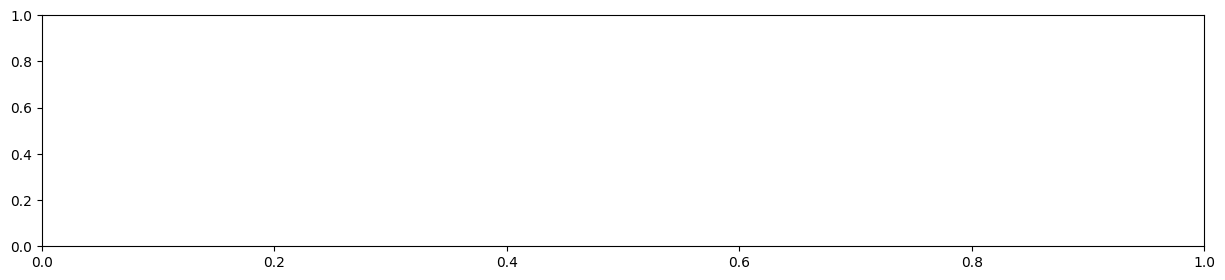

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier
import time 
# 配置输出文件夹
output_dir = "checkboard_plot_10"
os.makedirs(output_dir, exist_ok=True)
dynamic_random_state = int(time.time())
# 配置不平衡数据处理模型
ensemble_methods = {
    # 'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    # 'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    # 'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    # 'RUSBoost': RUSBoostClassifier(n_estimators=50),
    # 'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    # 'AdaCost': AdaCostClassifier(n_estimators=50),
    # 'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    # 'AsymBoost': AsymBoostClassifier(n_estimators=50),
    # 'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0, random_state=dynamic_random_state),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9259
OverBagging - AUC: 0.8677
OverBagging - AUPR: 0.5262
OverBagging - Sensitivity: 0.4700
OverBagging - Specificity: 0.9715
OverBagging - G-Mean: 0.6757
OverBagging - F1 Macro: 0.7477
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.7477
SMOTEBoost - AUC: 0.7488
SMOTEBoost - AUPR: 0.1586
SMOTEBoost - Sensitivity: 0.7950
SMOTEBoost - Specificity: 0.7430
SMOTEBoost - G-Mean: 0.7686
SMOTEBoost - F1 Macro: 0.6035
Training OverBoost...
OverBoost - Accuracy: 0.7423
OverBoost - AUC: 0.7506
OverBoost - AUPR: 0.1633
OverBoost - Sensitivity: 0.7850
OverBoost - Specificity: 0.7380
OverBoost - G-Mean: 0.7611
OverBoost - F1 Macro: 0.5976
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.6800
KmeansSMOTEBoost - AUC: 0.6211
KmeansSMOTEBoost - AUPR: 0.1306
KmeansSMOTEBoost - Sensitivity: 0.2850
KmeansSMOTEBoost - Specificity: 0.7195
KmeansSMOTEBoost - G-Mean: 0.4528
KmeansSMOTEBoost - F1 Macro: 0.4714
Training SMOTEBagging...
SMOTEBagging - 

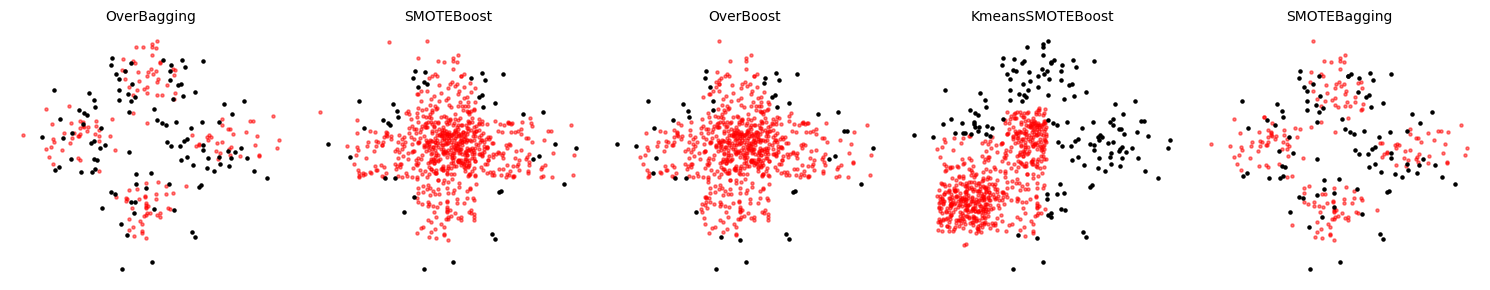

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "checkboard_plot_10"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
